<a href="https://colab.research.google.com/github/maxashoka3/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import plotly.plotly as py
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install chart-studio

     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=061695a98764f1e2358ae50cf345275988f6d150a78429072b834bf56afbb716
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:

from chart_studio import plotly as py

### **2.Data Preprocessing**
    2.1 Load Dataset

In [ ]:
#importing the both data
rossmann_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning Project/Rossmann Retail Sales Prediction/Rossmann Stores Data.csv',
                          parse_dates = True, index_col = 'Date')
store = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning Project/Rossmann Retail Sales Prediction/store.csv')


In [ ]:
# have a glance on the datasets
print("# of observations & # of features", rossmann_df.shape)
rossmann_df.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


2.2 Dealing with Missing Values

2.2.1 Count missing values in each dataset

In [ ]:
print("rossmann dataset : \n\n",rossmann_df.isnull().sum(),
      "\n\n Store: \n\n", store.isnull().sum())

rossmann dataset : 

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

 Store: 

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**2.2.2 Remove features with high percentages of missing values**

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [ ]:
# remove features
store = store.drop(['CompetitionOpenSinceMonth', 
                    'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

**2.2.3 Replace missing values in features with low percentages of missing values**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

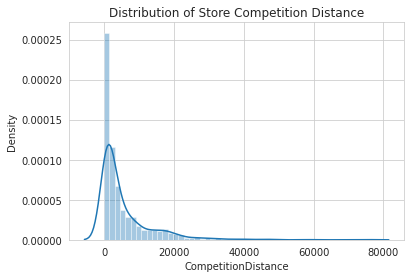

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor
# Let's first have a look at its distribution
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

**The distribution is right skewed, so we'll replace missing values with the median.**

In [ ]:
# replace missing values in Competition Distance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(),inplace = True)

**2.3 Data Extraction**

In [ ]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# extract year, month, day and week of year from 'Date
rossmann_df['Year'] = rossmann_df.index.year
rossmann_df['Month'] = rossmann_df.index.month
rossmann_df['Day'] = rossmann_df.index.day
rossmann_df['WeekOfYear'] = rossmann_df.index.weekofyear
rossmann_df = rossmann_df.reset_index()

In [ ]:
rossmann_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear'],
      dtype='object')

**2.4  Joining Tables**

In [ ]:
df = pd.merge(rossmann_df,store,how = 'left',on = 'Store')
df.head().T

,0,1,2,3,4
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015


In [ ]:
print(f'The length of new dataframe is : {len(df)}')

The length of new dataframe is : 1017209


**2.5 Drop Subsets of Data where might Cause Bias**

In [ ]:
# where dtores are closed, they won't generate sales, so we will removed features
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open',axis = 1)


In [ ]:
# see if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
df = df[df.Sales != 0]

**2.6 Feature Engineering**

In [ ]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [ ]:
# see what's in nominal variables
set(df.StateHoliday), set(df.StoreType),set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [ ]:
''' 
StateHoliday indicates a state holiday
a = public holiday,b = Easter holiday, c= Chrismas, 0 = None
Converting number 0 to string 0'''
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [ ]:
# make a copy in case I mess up anything
df1 = df.copy()

**2.6.1 Create new variable "AvgSales"**

Create a variable that calculates monthly average sales for each store

In [ ]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [ ]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)


In [ ]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

**2.6.2 Create new variable "AvgCustomer**
create a variable that calculates Monthly average number of customers for each store store, because daily number of customer is another variable to be predicted

In [ ]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [ ]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)


In [ ]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [ ]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

In [ ]:
df1.head()

,Date,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,AvgSales,cust_key,AvgCustomer
0,2015-07-31,1,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,201571,4491.333333,201571,519.407407
1,2015-07-31,2,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,201572,4954.259259,201572,621.222222
2,2015-07-31,3,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,201573,6797.592593,201573,682.888889
3,2015-07-31,4,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,201574,10256.851852,201574,1294.259259
4,2015-07-31,5,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,201575,4599.629630,201575,521.703704


**2.6.3 Transform Variable "StateHoliday"**

In [ ]:
# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})


In [ ]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

### **3.Exploratory Data Analysis**

**3.1 Correlation Heatmap**
create a heatmap to see corelation between all variables

In [ ]:
# becasue my computer keeps crashing, I had to sample the dataset 
dfv = df.sample(n=5000, random_state=1)

In [ ]:
corr = df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

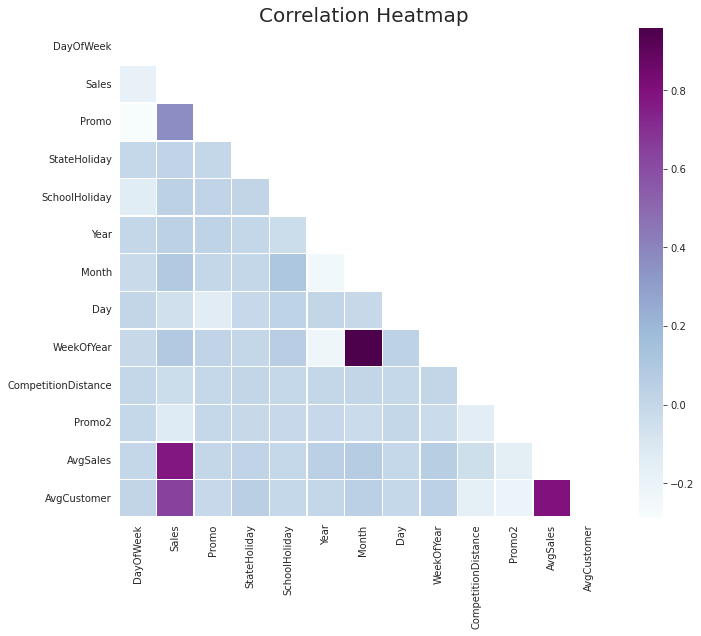

In [ ]:
from IPython.core.pylabtools import figsize
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)]= True
f,ax = plt.subplots(figsize = (11,9))
sns.heatmap(corr,mask = mask,
            square = True, linewidth = .5,ax= ax,cmap = "BuPu")
plt.title("Correlation Heatmap",fontsize= 20)

**3.2 Sales Distributiont**

In [ ]:
sales_dist = [go.Histogram(x=df.Sales, 
                           marker=dict(color='pink'))]
layout2 = go.Layout(title='Sales Distribution', 
                    xaxis=dict(title='daily sales in $'),
                    yaxis=dict(title='number of observations'))
fig2 = go.Figure(data=sales_dist, layout=layout2)
py.iplot(fig2)

3.3 Customer Distribution

In [ ]:
cust_dist = [go.Histogram(x=dfv.Customers, marker=dict(color=('rgb(158,202,225')))]
layout3 = go.Layout(title='Customer Distribution', 
                   xaxis=dict(title='daily total number of customers'), yaxis=dict(title='number of observations'))
fig3 = go.Figure(data=cust_dist, layout=layout3)
py.iplot(fig3)

3.4 Sales Over Time

In [ ]:
store1_2015 = df.query('Store == 1 and Year == 2015')
store1_2013 = df.query('Store == 1 and Year == 2013')
store1_2014 = df.query('Store == 1 and Year == 2014')

In [ ]:
trace_2013 = go.Scatter(
                x=store1_2013.Date,
                y=store1_2013.Sales,
                name = "2013",
                opacity = 0.8)

trace_2014 = go.Scatter(
                x=store1_2014.Date,
                y=store1_2014.Sales,
                name = "2014",
                opacity = 0.8)

trace_2015 = go.Scatter(
                x=store1_2015.Date,
                y=store1_2015.Sales,
                name = "2015",
                opacity = 0.8)

data = [trace_2013,trace_2014, trace_2015]
layout = go.Layout(title='Sales Over Time', 
                   xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

3.5 Sales Over Days Of A Month

In [ ]:
day_s = [go.Scatter(x=dfv.Day, y=dfv.Sales, mode='markers', 
                    marker=dict(size=15, color=dfv.Customers, colorbar=dict(title='Number Of Customers'),))]
layout5 = go.Layout(title='Sales Over Days Of A Month', 
                   xaxis=dict(title='Day Of Month'), yaxis=dict(title='Total Sales'))
fig5 = go.Figure(data=day_s, layout=layout5)
py.iplot(fig5)

3.6 Sales Over Weeks

In [ ]:
trace = go.Bar(x=dfv.WeekOfYear,
                y=dfv.Sales,
                name = "WeekOfYear", marker=dict(color=dfv.WeekOfYear, colorscale='Jet'))

data = [trace]
layout = go.Layout(title='Sales Over Week Of Year', 
                   xaxis=dict(title='Week Of Year'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
day_w = [go.Bar(x=dfv.DayOfWeek, y=dfv.Sales, 
                marker=dict(color=dfv.DayOfWeek,
                            colorscale ='Viridis'))]
layout6 = go.Layout(title='Sales Over Days Of A Week', 
                   xaxis=dict(title='Day Of Week'), yaxis=dict(title='Total Sales'))
fig6 = go.Figure(data=day_w, layout=layout6)
py.iplot(fig6)

3.7 Sales By Store Type

In [ ]:
# StoreType - differentiates between 4 different store models: a, b, c, d
s_type = [go.Box(x=dfv.StoreType, y=dfv.Sales,
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout7 = go.Layout(title='Sales By Store Type', 
                   xaxis=dict(title='Store Type'), yaxis=dict(title='Total Sales'))
fig7 = go.Figure(data=s_type, layout=layout7)
py.iplot(fig7)

3.8 Sales By Assortment

In [ ]:
# Assortment - describes an assortment level: a = basic, b = extra, c = extended
s_assort = [go.Box(x=dfv.Assortment, y=dfv.Sales,marker=dict(color='green'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout8 = go.Layout(title='Sales By Assortment', 
                   xaxis=dict(title='Assortment'), yaxis=dict(title='Total Sales'))
fig8 = go.Figure(data=s_assort, layout=layout8)
py.iplot(fig8)

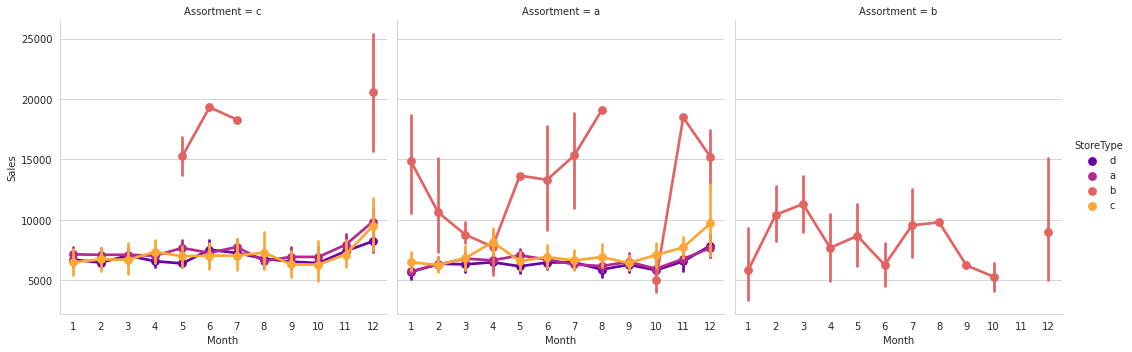

In [ ]:
sns.factorplot(data = dfv, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

3.9 Sales vs. Number Of Customers

In [ ]:
cust_s = [go.Scatter(x=dfv.Customers, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.CompetitionDistance,
                                 colorbar=dict(title='Competition Distance'),colorscale='Earth'))]
layout9 = go.Layout(title='Sales vs. Number Of Customers', 
                   xaxis=dict(title='Number Of Customers'), yaxis=dict(title='Sales'))
fig9 = go.Figure(data=cust_s, layout=layout9)
py.iplot(fig9)

3.10 Sales vs. Competition Distance

In [ ]:
distance_s = [go.Scatter(x=dfv.CompetitionDistance, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.Customers,
                                 colorbar=dict(title='Number Of Customers'),colorscale='Jet'))]
layout10 = go.Layout(title='Sales vs. Competition Distance', 
                   xaxis=dict(title='Competition Distance'), yaxis=dict(title='Sales'))
fig10 = go.Figure(data=distance_s, layout=layout10)
py.iplot(fig10)

3.11 Sales By Promotion

In [ ]:
s_promo = [go.Box(x=dfv.Promo, y=dfv.Sales,marker=dict(color='purple'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout11 = go.Layout(title='Sales By Promotion', 
                   xaxis=dict(title='Promotion(0-No Promotion; 1-Promotion Period)'), yaxis=dict(title='Total Sales'))
fig11 = go.Figure(data=s_promo, layout=layout11)
py.iplot(fig11)

In [ ]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0, 0.5, 'Sales')

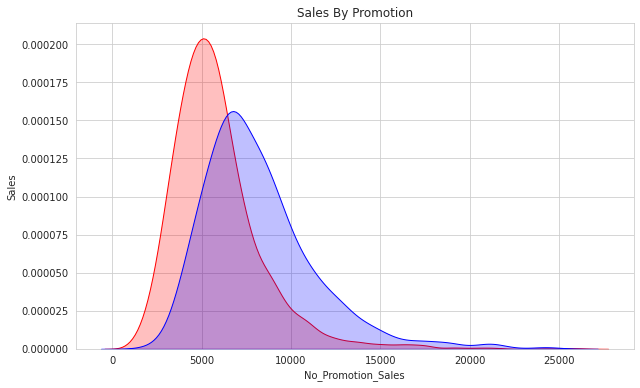

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

3.12 Pair Plot

In [ ]:
plt.figure()
sns.pairplot(df, kind='reg')
plt.title('Pair Plot', fontsize=20)

4. Store Sales Prediction

In [ ]:
# since I ran into memorry error and wasn't able to solve it (even on AWS Sagemaker), 
# I had to use to sample dataset with 50000 observations to build ML models.
dfd = df1.sample(n=50000, random_state=1)

In [ ]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [ ]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [ ]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)


In [ ]:
# split training and test datasets
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)


4.1 Linear Regression (OLS)

In [ ]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [ ]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7534426463092014 , Out of Sample Test Score : 0.7374031695181285
Training RMSE : 1558.666986443433 Testing RMSE : 1569.7998978110754
Training MAPE : 16.994613661283044 Testing MAPE : 17.223983944754266


4.2 Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [ ]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7534416656134255 , Out of Sample Test Score : 0.7373596254116661
Training RMSE : 1558.6700862832608 Testing RMSE : 1569.930045422313
Training MAPE : 16.994522837437668 Testing MAPE : 17.22370067239497


4.3 LARS Lasso Regression

In [ ]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7534242474036911 , Out of Sample Test Score : 0.737279530870145
Training RMSE : 1558.7251417391271 Testing RMSE : 1570.1694093096548
Training MAPE : 16.995601772979512 Testing MAPE : 17.223041874169997


4.4 Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [ ]:
print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)
print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.8547355290084072 , Out of Sample Test Score : 0.7905234976899088
Training RMSE : 1196.3935424504407 Testing RMSE : 1402.0619825453816
Training MAPE : 12.460619402882115 Testing MAPE : 14.72093309588586


4.5 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [ ]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.9779506376180428 , Out of Sample Test Score : 0.8422624000462349
Training RMSE : 466.1142436219919 Testing RMSE : 1216.6542311718824
Training MAPE : 4.751290118862767 Testing MAPE : 12.563905967886454


4.6 K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.6275829231074073 , Out of Sample Test Score : 0.5761647172167876
Training RMSE : 1915.6190634834409 Testing RMSE : 1994.3349960691344
Training MAPE : 22.92328723312777 Testing MAPE : 23.86808737338713


**Feature Importance**

Text(0.5, 0, 'Relative Importance')

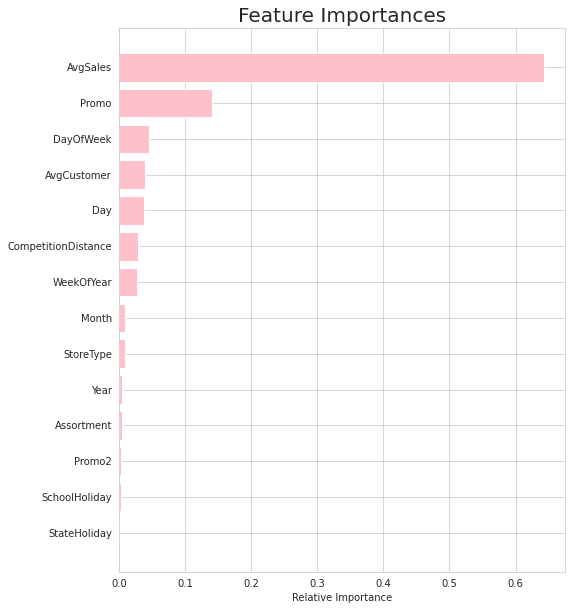

In [ ]:
features = xl_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')